In [1]:
import json
import os
import matplotlib.pyplot as plt
import re
import numpy as np

42

['bellman_ford']

1.0

False

10000

[DEBUG] Quality_loss: 3.3676345348358154, L2_loss: 1.5253583192825317, L2_regularisation_weight: 0.10000000149011612, L3_loss: 3.7535576820373535, L3_regularisation_weight: 0.0, L3_cocycle_loss: 2.868436813354492, L3_multimorphism_loss: 4.638678550720215

[DEBUG-VAL] L2_loss: 2.5038344860076904, L2_regularisation_weight: 0.10000000149011612, L3_loss: 10.148113250732422, L3_regularisation_weight: 0.0, L3_cocycle_loss: 8.093457221984863, L3_multimorphism_loss: 12.202770233154297

[DEBUG-VAL] L2_loss: 2.3377737998962402, L2_regularisation_weight: 0.10000000149011612, L3_loss: 10.549345016479492, L3_regularisation_weight: 0.0, L3_cocycle_loss: 8.075743675231934, L3_multimorphism_loss: 13.022947311401367

[DEBUG] Quality_loss: 4.858154296875, L2_loss: 1.7221051454544067, L2_regularisation_weight: 0.10000000149011612, L3_loss: 6.494559288024902, L3_regularisation_weight: 0.0, L3_cocycle_loss: 4.985726833343506, L3_multimorphism_loss: 8.00339126586914


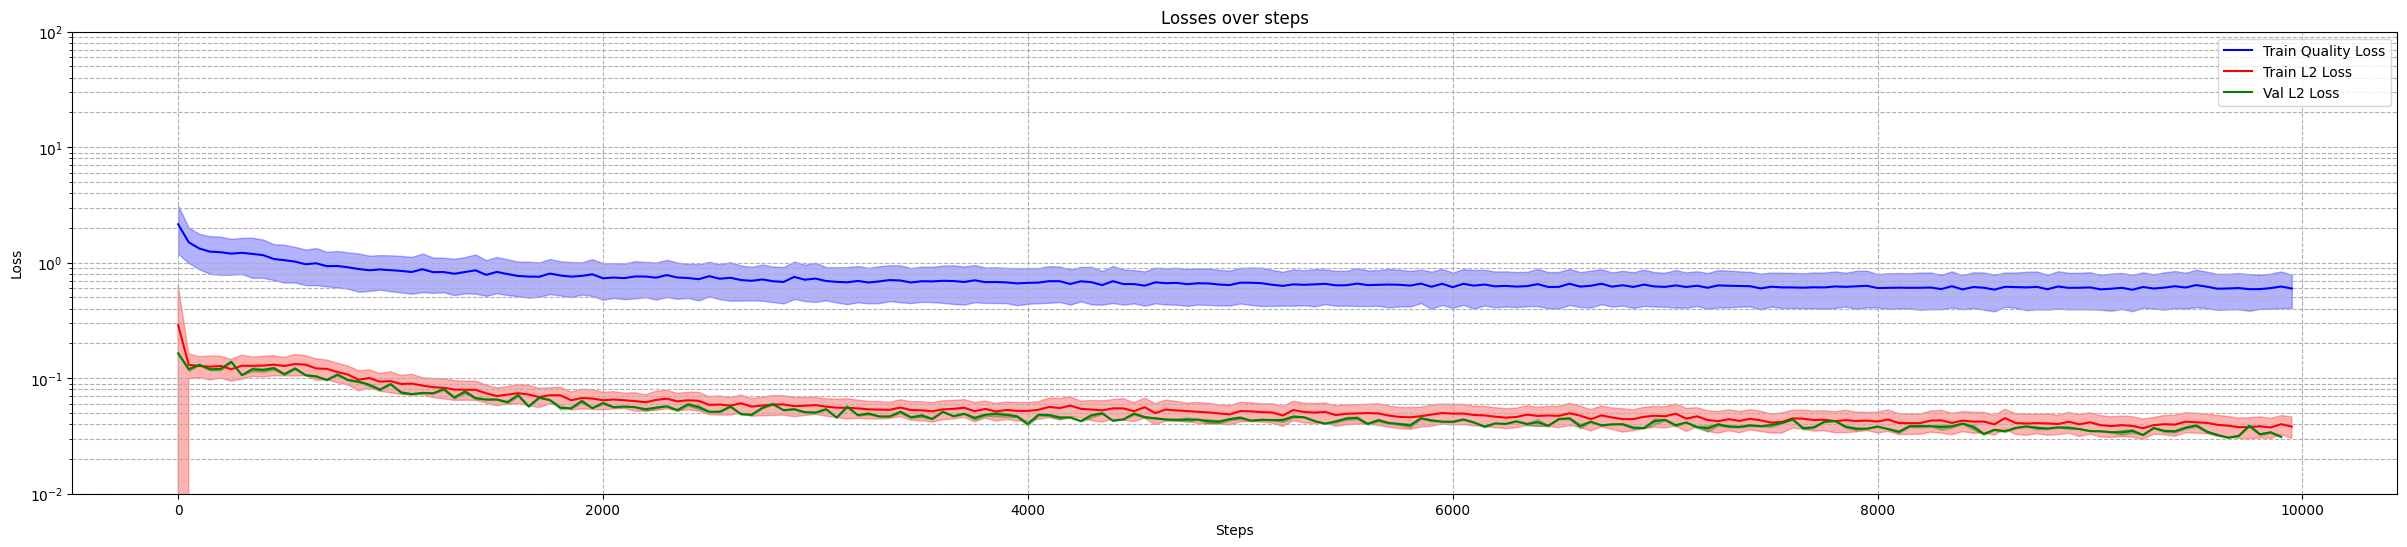

In [8]:
experiment_id = 8
# Experiment to run
folder = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}"
experiments_path = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"

quality_losses = []
regularisation_losses = []
regularisation_losses_val = []

with open(experiments_path, 'r') as file:
    lines = file.readlines()

    for line in lines:
        print(line)
        # Extracting the current loss from the given log line
        # Regular expression to match the current loss value
        match = re.search(r"\[DEBUG\] Quality_loss: ([\d\.]+), L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

        if match:
            # Extract the step, current loss, and current train items if present
            quality_loss, mse_loss, regularisation_weight, _, _, _, _ = match.groups()
            # Add to lists
            quality_losses.append(float(quality_loss))
            regularisation_losses.append(float(mse_loss))

        # Extracting the current loss from the given log line
        # Regular expression to match the current loss value
        match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

        if match:
            # Extract the step, current loss, and current train items if present
            mse_loss, regularisation_weight, _, _, _, _ = match.groups()
            # Add to validation list
            regularisation_losses_val.append(float(mse_loss))

# Remove first element
quality_losses = quality_losses[1:]
regularisation_losses = regularisation_losses[1:]
regularisation_losses_val = regularisation_losses_val[2:-1]

print(len(quality_losses))
print(len(regularisation_losses))
print(len(regularisation_losses_val))

num_elements = 50
num_elements_val = 2
#quality_losses = quality_losses[:limit_steps]
#regularisation_losses = regularisation_losses[:limit_steps]
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

means_regularisation = np.array([np.mean(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
std_regularisation = np.array([np.std(regularisation_losses [i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])

means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])
std_regularisation_val = np.array([np.std(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

#### 
# Try with median and quartiles
####

print(len(means_regularisation_val))
print(len(std_regularisation_val))

steps = list(range(0, len(quality_losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(30, 6))
plt.plot(steps, means_quality, linestyle='-', color='blue', label='Train Quality Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3)

plt.plot(steps, means_regularisation, linestyle='-', color='red', label='Train L2 Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3)

plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L2 Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3)

plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-2, 1e2)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses over steps')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.savefig(f"{folder}/losses_std.png", dpi=300)
plt.show()

In [111]:
experiment_id = 6
# Experiment to run
folder = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}"
experiments_path = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"
experiments_test_path = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}/experiment_log_test.out"

quality_losses = []
regularisation_losses = []
regularisation_losses_val = []
regularisation_losses_test = []

with open(experiments_path, 'r') as file:
    lines = file.readlines()

    for line in lines:
        
        # Extracting the current loss from the given log line
        # Regular expression to match the current loss value
        match = re.search(r"\[DEBUG\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+), Quality loss: ([\d\.]+)", line)

        if match:
            # Extract the step, current loss, and current train items if present
            regularised_loss, regularisation_weight, mse_loss, quality_loss = match.groups()
            # Add to lists
            quality_losses.append(float(quality_loss))
            regularisation_losses.append(float(mse_loss))

        # Extracting the current loss from the given log line
        # Regular expression to match the current loss value
        match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)

        if match:
            # Extract the step, current loss, and current train items if present
            regularised_loss, regularisation_weight, mse_loss = match.groups()
            # Add to validation list
            regularisation_losses_val.append(float(mse_loss))

with open(experiments_test_path, 'r') as file:
    lines = file.readlines()

    for line in lines:

        # Extracting the current loss from the given log line
        # Regular expression to match the current loss value
        match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)

        if match:
            # Extract the step, current loss, and current train items if present
            regularised_loss, regularisation_weight, mse_loss = match.groups()
            # Add to validation list
            regularisation_losses_test.append(float(mse_loss))

# Remove first element
quality_losses = quality_losses[1:]
regularisation_losses = regularisation_losses[1:]
regularisation_losses_val = regularisation_losses_val[2:-1]

print(len(quality_losses))
print(len(regularisation_losses))
print(len(regularisation_losses_val))
print(len(regularisation_losses_test))

9999
9999
398
512


0.0
199
199


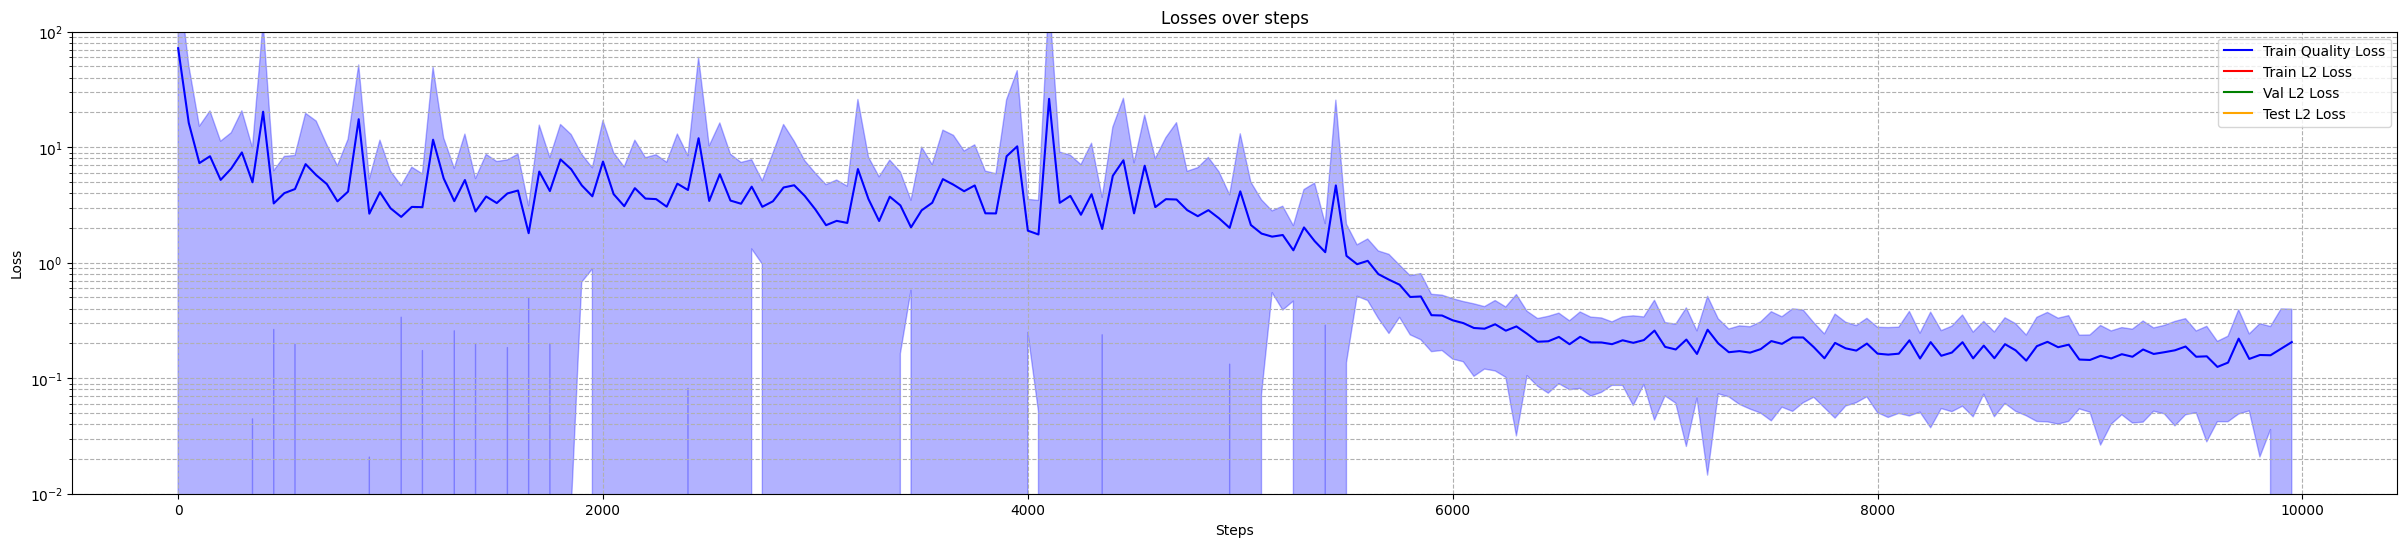

In [112]:
num_elements = 50
num_elements_val = 2
#quality_losses = quality_losses[:limit_steps]
#regularisation_losses = regularisation_losses[:limit_steps]
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

means_regularisation = np.array([np.mean(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
std_regularisation = np.array([np.std(regularisation_losses [i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])

means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])
std_regularisation_val = np.array([np.std(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

means_test = np.mean(np.array(regularisation_losses_test))
print(means_test)
#### 
# Try with median and quartiles
####

print(len(means_regularisation_val))
print(len(std_regularisation_val))

steps = list(range(0, len(quality_losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(30, 6))
plt.plot(steps, means_quality, linestyle='-', color='blue', label='Train Quality Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3)

plt.plot(steps, means_regularisation, linestyle='-', color='red', label='Train L2 Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3)

plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L2 Loss')
plt.plot(steps, np.repeat(means_test, len(steps)), linestyle='-', color='orange', label='Test L2 Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3)

plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-2, 1e2)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses over steps')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.savefig(f"{folder}/losses_std.png", dpi=300)
plt.show()

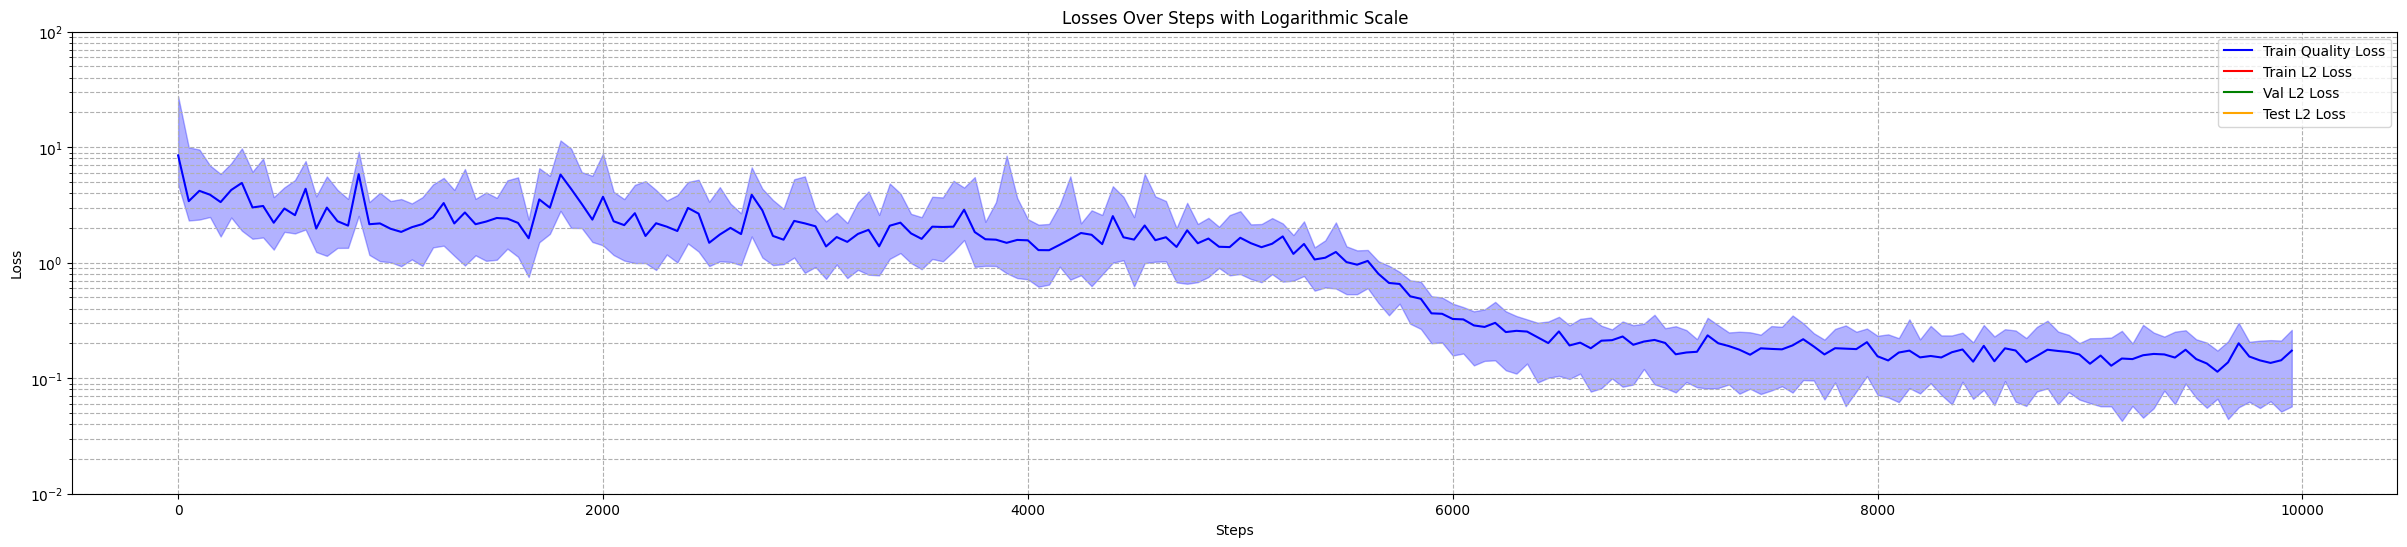

In [113]:
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
medians_quality = np.array([np.median(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
percentile_25_quality = np.array([np.percentile(quality_losses[i:i+num_elements], 25) for i in range(0, len(quality_losses), num_elements)])
percentile_75_quality = np.array([np.percentile(quality_losses[i:i+num_elements], 75) for i in range(0, len(quality_losses), num_elements)])

medians_regularisation = np.array([np.median(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
percentile_25_regularisation = np.array([np.percentile(regularisation_losses[i:i+num_elements], 25) for i in range(0, len(regularisation_losses), num_elements)])
percentile_75_regularisation = np.array([np.percentile(regularisation_losses[i:i+num_elements], 75) for i in range(0, len(regularisation_losses), num_elements)])

means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

steps = list(range(0, len(quality_losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(30, 6))
plt.plot(steps, medians_quality, linestyle='-', color='blue', label='Train Quality Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, percentile_25_quality, percentile_75_quality, color='blue', alpha=0.3)

plt.plot(steps, medians_regularisation, linestyle='-', color='red', label='Train L2 Loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, percentile_25_regularisation, percentile_75_regularisation, color='red', alpha=0.3)

plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L2 Loss')
plt.plot(steps, np.repeat(means_test, len(steps)), linestyle='-', color='orange', label='Test L2 Loss')
# Plot standard deviations as transparent ranges

plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-2, 1e2)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses Over Steps with Logarithmic Scale')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.savefig(f"{folder}/losses_percentile.png", dpi=300)
plt.show()